# Team 19 - COMP 472 (Artificial Intelligence) Mini Project 1: Emotion and Sentiment Classification of Reddit Posts
by
Vithushen Sivasubramaniam (40112363), Vejay Thanamjeyasingam (40112236), and David Xie (40065595)

October 22, 2022

## 1. Dataset Preparation & Analysis (5pts)

### 1.1. □ (0pts) Download the version of the GoEmotion dataset provided on Moodle.
The original GoEmotion dataset, created by [Demszky et al., 2020], is a dataset of 58k humanannotated
Reddit comments labeled with 27+1 emotion categories (eg. admiration, amusement, anger,
caring, . . . ) and neutral. These emotions are themselves organized into 4 sentiments: positive (admiration,
amusement, . . . ), negative (anger, annoyance, . . . ), ambiguous (confusion, curiosity) and
neutral (neutral )). This allows us to use the dataset for both:
* emotion classification (into 28 classes), and
* sentiment classification (into 4 classes).

For more information on the original dataset, you can read this blog and this paper.
The dataset we will use for this assignment is a modified version of the original GoEmotion, where only
posts annotated with a single emotion (and a single sentiment) are kept, and the data is formatted in
json. The json file contains triplets made of the post, its emotion and its sentiment.

### 1.2. □ (0pts) Load the dataset. 
You can use gzip.open and json.load to do that.

In [1]:
import json
import gzip
from matplotlib import pyplot as plt
from collections import Counter

# opens file using GZIP and json.load
with gzip.open('goemotions.json.gz', 'rb') as f:
    file_content = json.load(f)

### 1.3. □ (5pts) Extract the posts and the 2 sets of labels (emotion and sentiment), then plot the distribution of the posts in each category and save the graphic (a histogram or pie chart) in pdf. 

Do this for both the emotion and the sentiment categories. You can use matplotlib.pyplot and savefig to do this. This pre-analysis of the dataset will allow you to determine if the classes are balanced, and which metric is more appropriate to use to evaluate the performance of your classifiers.

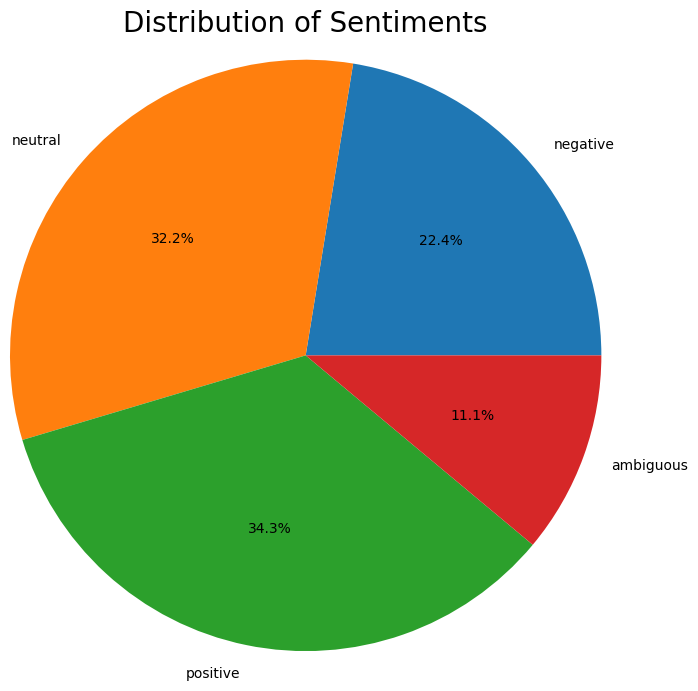

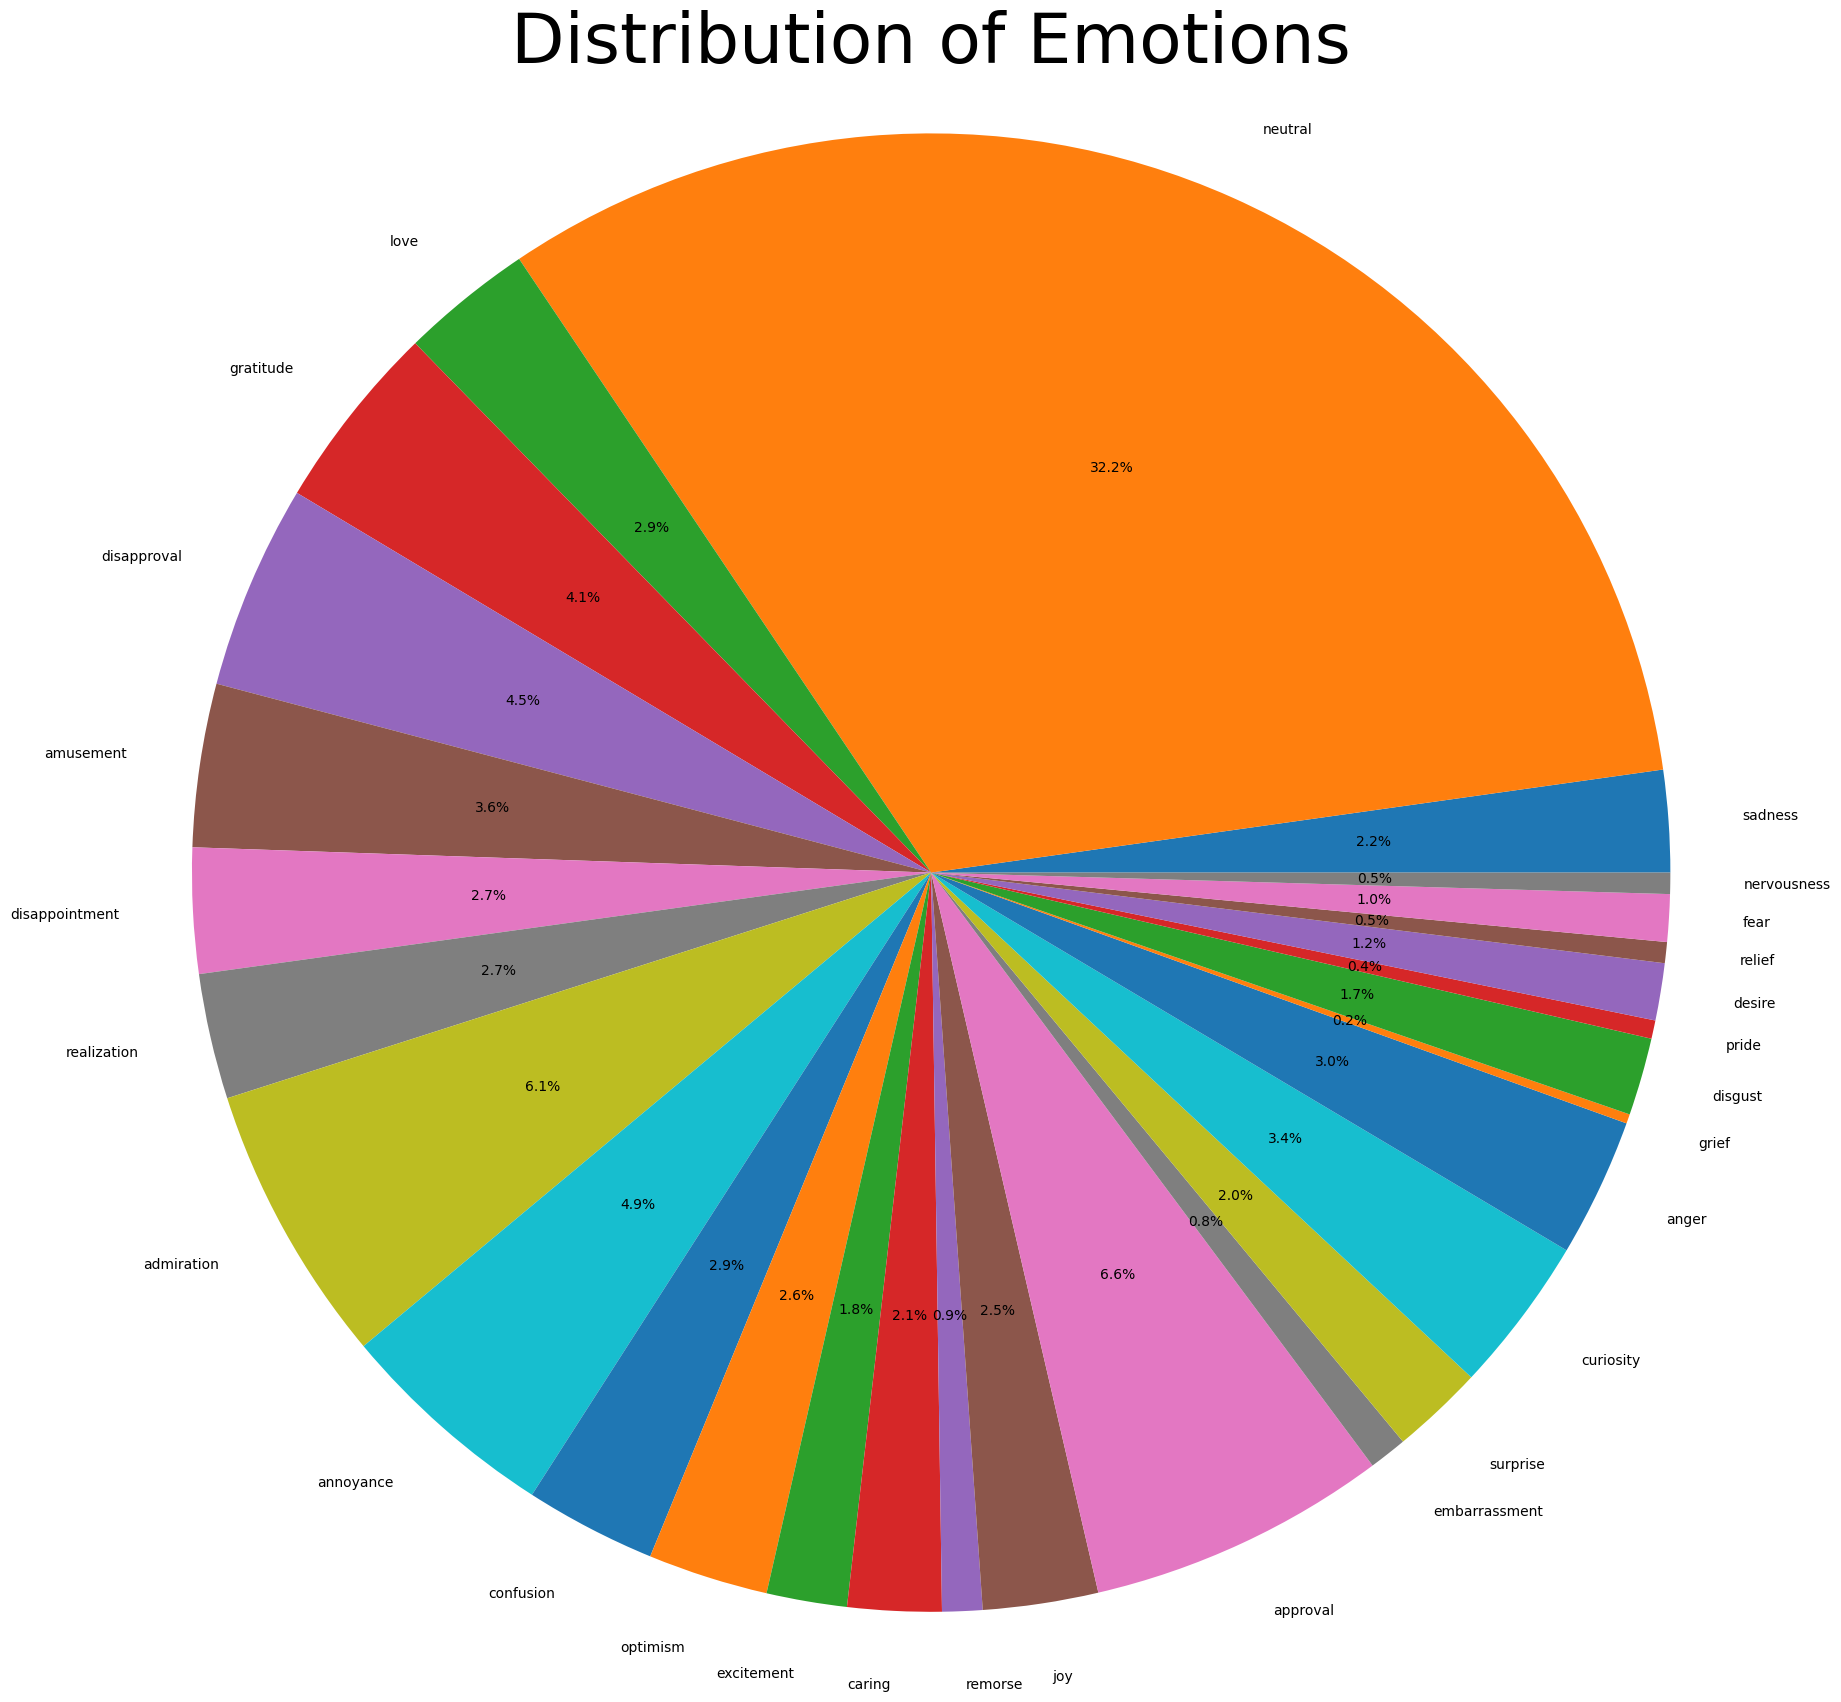

In [2]:
# Store emotions and sentiments in list
emotionList = []
sentimentList = []

for post in file_content:
    emotionList.append(post[1])
    sentimentList.append(post[2])
    

# Generate graphs using sentiment and emotion Lists
plt.figure(0)
plt.title('Distribution of Sentiments', pad=100, fontdict = {'fontsize' : 20})
plt.pie(Counter(sentimentList).values(), labels=Counter(sentimentList).keys(), radius=2, autopct="%0.1f%%")
plt.savefig("sentimentGraph.pdf", bbox_inches='tight')

plt.figure(1)
plt.title('Distribution of Emotions', pad=450, fontdict = {'fontsize' : 50})
plt.pie(Counter(emotionList).values(), labels=Counter(emotionList).keys(), radius=5, autopct="%0.1f%%")
plt.savefig("emotionGraph.pdf", bbox_inches='tight')

plt.show()

### 2.1. □ (5pts) Process the dataset using feature extraction.text.CountVectorizer to extract tokens/words and their frequencies. 
Display the number of tokens (the size of the vocabulary) in the dataset.

In [3]:
#Display number of tokens and their frequencies
from sklearn.feature_extraction.text import CountVectorizer
posts = []

cv=CountVectorizer()

for post in file_content:
    posts.append(post[0])
print("Number of posts: ", len(posts))

tokens=cv.fit(posts)
print("Number of tokens: ", len(tokens.vocabulary_))

Number of posts:  171820
Number of tokens:  30449


### 2.2. □ (2pts) Split the dataset into 80% for training and 20% for testing. 
For this, you can use train test split.

In [4]:
#Splitting the dataset (80% training and 20% testing)
from sklearn.model_selection import train_test_split

#post-emotion model
X1 = cv.fit_transform(posts)
y1 = emotionList
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20)

print("Size of X1_train: ", X1_train.shape)
print("Size of X1_test: ", X1_test.shape)
print("\n")

print("Size of y1_train: ", len(y1_train))
print("Size of y1_test: ", len(y1_test))
print("\n")

#post-sentiment model
X2 = cv.fit_transform(posts)
y2 = sentimentList
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20)

print("Size of X2_train: ", X2_train.shape)
print("Size of X2_test: ", X2_test.shape)
print("\n")

print("Size of y2_train: ", len(y2_train))
print("Size of y2_test: ", len(y2_test))

Size of X1_train:  (137456, 30449)
Size of X1_test:  (34364, 30449)


Size of y1_train:  137456
Size of y1_test:  34364


Size of X2_train:  (137456, 30449)
Size of X2_test:  (34364, 30449)


Size of y2_train:  137456
Size of y2_test:  34364


### 2.3. Train and test the following classifiers, for both the emotion and the sentiment classification, using word frequency as features.

#### 2.3.1. □ (3pts) Base-MNB: a Multinomial Naive Bayes Classifier (naive bayes.MultinomialNB.html) with the default parameters.

In [5]:
from sklearn.naive_bayes import MultinomialNB

NB1 = MultinomialNB()
NB2 = MultinomialNB()

#train for emotions
base_MNB_emotion = NB1.fit(X1_train, y1_train)
#train for sentiments
base_MNB_sentiment = NB2.fit(X2_train, y2_train)

#test for emotions
base_MNB_emotion_predict = base_MNB_emotion.predict(X1_test)
print("Accuracy of posts-emotions: ", base_MNB_emotion.score(X1_test, y1_test))

#test for sentiments
base_MNB_sentiment_predict = base_MNB_sentiment.predict(X2_test)
print("Accuracy of posts-sentiments: ", base_MNB_sentiment.score(X2_test, y2_test))

Accuracy of posts-emotions:  0.3823478058433244
Accuracy of posts-sentiments:  0.5372191828657897


#### 2.3.2. □ (3pts) Base-DT: a Decision Tree (tree.DecisionTreeClassifier) with the default parameters.

In [6]:
from sklearn.tree import DecisionTreeClassifier

#Create Decision Tree object
dt1=DecisionTreeClassifier()

#Train Decision Tree Classifier For Emotions 
dt1=dt1.fit(X1_train, y1_train) #For Emotions

#Predict the response for Test Dataset 
base_DT_emotion_predict = dt1.predict(X1_test)


In [7]:
#Create Decision Tree object for Sentiments
dt2=DecisionTreeClassifier()

#Train Decision Tree Classifier For Sentiments 
dt2=dt2.fit(X2_train, y2_train) #For Sentiments

#Predict the response for Test Dataset 
base_DT_sentiment_predict = dt2.predict(X2_test)

In [8]:
from sklearn import metrics 
print("Emotion Accuracy: ", dt1.score(X1_test, y1_test))
print("Sentiment Accuracy: ", dt2.score(X2_test, y2_test))

Emotion Accuracy:  0.35831102316377605
Sentiment Accuracy:  0.5378593877313468


#### 2.3.3. □ (3pts) Base-MLP: a Multi-Layered Perceptron (neural network.MLPClassifier) with the default parameters.

In [9]:
#2.3.3 Base-MLP
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1).fit(X1_train, y1_train)
base_MLP_emotion_predict = mlp.predict(X1_test)
emotionAccuracy = mlp.score(X1_test, y1_test)

print("Prediction accuracy for emotions: ", emotionAccuracy)

C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Prediction accuracy for emotions:  0.4341170992899546


In [10]:
mlp2 = MLPClassifier(max_iter=1).fit(X2_train, y2_train)
base_MLP_sentiment_predict = mlp2.predict(X2_test)
sentimentAccuracy = mlp2.score(X2_test, y2_test)

print("Prediction accuracy for sentiments: ", sentimentAccuracy)

Prediction accuracy for sentiments:  0.5610522639972064


C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 2.3.4. □ (3pts)Top-MNB: a better performing Multinomial Naive Bayes Classifier found using GridSearchCV.
The gridsearch will allow you to find the best combination of hyper-parameters, as determined
by the evaluation function that you have determined in step 1.3. The only hyper-parameter that
you will experiment with is alphafloat with values 0.5, 0 and 2 other values of your choice.

In [11]:
#importing GridSearchCV Library
from sklearn.model_selection import GridSearchCV

parameters={
    "alpha": (0.0, 0.5, 1.5, 2.0)
}

NB1 = MultinomialNB()
NB2 = MultinomialNB()

In [12]:
#Emotion
NB_grid_emotion= GridSearchCV(NB1, param_grid=parameters)
NB_grid_emotion.fit(X1_train,y1_train)

#Sentiment
NB_grid_sentiment= GridSearchCV(NB2, param_grid=parameters)
NB_grid_sentiment.fit(X2_train,y2_train)

C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warni

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': (0.0, 0.5, 1.5, 2.0)})

In [13]:
#Finding the best hyperparameter
NB_grid_emotion.best_params_

{'alpha': 0.5}

In [14]:
NB_grid_sentiment.best_params_ 

{'alpha': 0.5}

In [15]:
NB_grid_emotion.best_estimator_

MultinomialNB(alpha=0.5)

In [16]:
NB_grid_sentiment.best_estimator_

MultinomialNB(alpha=0.5)

In [17]:
#Score for emotion
NB_grid_emotion_predict = NB_grid_emotion.predict(X1_test)
print(f'Emotion Accuracy- : {NB_grid_emotion.score(X1_test, y1_test)}')
#Score for sentiment
NB_grid_sentiment_predict = NB_grid_sentiment.predict(X2_test)
print(f'Sentiment Accuracy- : {NB_grid_sentiment.score(X2_test, y2_test)}')

Emotion Accuracy- : 0.39046676754743337
Sentiment Accuracy- : 0.5366662786637179


#### 2.3.5. □ (3pts) Top-DT: a better performing Decision Tree found using GridSearchCV. 
The hyperparameters that you will experiment with are:
* criterion: gini or entropy
* max depth: 2 different values of your choice
* min samples split: 3 different values of your choice

In [18]:
from sklearn.model_selection import GridSearchCV
parameters={
    "criterion": ['gini','entropy'],
    "max_depth" : (1,10),
    "min_samples_split": (2,4,6)
}

dt1=DecisionTreeClassifier()
dt2=DecisionTreeClassifier()

In [19]:
#Emotion
DT_grid_emotion= GridSearchCV(dt1, param_grid=parameters)
DT_grid_emotion.fit(X1_train,y1_train)

#Sentiment
DT_grid_sentiment= GridSearchCV(dt2, param_grid=parameters)
DT_grid_sentiment.fit(X2_train,y2_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': (1, 10),
                         'min_samples_split': (2, 4, 6)})

In [20]:
#Finding the best hyperparameter
DT_grid_emotion.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 6}

In [21]:
DT_grid_sentiment.best_params_ 

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}

In [22]:
DT_grid_emotion.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=6)

In [23]:
DT_grid_sentiment.best_estimator_

DecisionTreeClassifier(max_depth=10)

In [24]:
print(f'Emotion Accuracy- : {DT_grid_emotion.score(X1_test, y1_test)}')
print(f'Sentiment Accuracy- : {DT_grid_sentiment.score(X2_test, y2_test)}')

Emotion Accuracy- : 0.38816785007566057
Sentiment Accuracy- : 0.42890815970201374


In [25]:
top_DT_emotion_predict = DT_grid_emotion.predict(X1_test)
top_DT_sentiment_predict = DT_grid_sentiment.predict(X2_test)

#### 2.3.6. □ (3pts) Top-MLP: a better performing Multi-Layered Perceptron found using GridSearchCV.
The hyper-parameters that you will experiment with are:
* activation: sigmoid, tanh, relu and identity
* 2 network architectures of your choice: for eg, 2 hidden layers with 30+50 nodes and 3 hidden layers with 10 + 10 + 10
* solver: Adam and stochastic gradient descent

In [26]:
#define hyperparameters
search_space = {
    "activation": ['sigmoid', 'tanh', 'relu', 'identity'],
    "hidden_layer_sizes": [(30,50), (10,10,10)],
    "solver": ['adam', 'sgd']
}

mlp1 = MLPClassifier(max_iter=1)
mlp2 = MLPClassifier(max_iter=1)

In [27]:
gs1 = GridSearchCV(mlp1, search_space)
gs1.fit(X1_train, y1_train)

top_MLP_emotion_predict = gs1.predict(X1_test)
emotionAccuracy = gs1.score(X1_test, y1_test)

print("Prediction accuracy for emotions: ", emotionAccuracy)

C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

Prediction accuracy for emotions:  0.4299848678849959


C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
gs2 = GridSearchCV(mlp2, search_space)
gs2.fit(X2_train, y2_train)
top_MLP_sentiment_predict = gs2.predict(X2_test)
sentimentAccuracy = gs2.score(X2_test, y2_test)

print("Prediction accuracy for sentiments: ", sentimentAccuracy)

C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

Prediction accuracy for sentiments:  0.5625072750552904


C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
#Finding the best hyperparameter
gs1.best_params_

{'activation': 'identity', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}

In [30]:
gs2.best_params_ 

{'activation': 'relu', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}

In [31]:
gs1.best_estimator_

MLPClassifier(activation='identity', hidden_layer_sizes=(30, 50), max_iter=1)

In [32]:
gs2.best_estimator_

MLPClassifier(hidden_layer_sizes=(30, 50), max_iter=1)

### 2.4. □ (5pts) For each of the 6 classifiers above and each of the classification tasks (emotion or sentiment), produce and save the following information in a file called performance:
* a string clearly describing the model (e.g. the model name + hyper-parameter values) and the classification task (emotion or sentiment)
* the confusion matrix – use metrics.confusion matrix
* the precision, recall, and F1-measure for each class, and the accuracy, macro-average F1 and weighted-average F1 of the model – use metrics.classification report

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

#Base MNB Emotion
base_MNB_emotion_confusion = confusion_matrix(y1_test, base_MNB_emotion_predict)
base_MNB_emotion_classification = classification_report(y1_test, base_MNB_emotion_predict)

#Base MNB Sentiment
base_MNB_sentiment_confusion = confusion_matrix(y2_test, base_MNB_sentiment_predict)
base_MNB_sentiment_classification = classification_report(y2_test, base_MNB_sentiment_predict)

C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [34]:
#Top MNB Emotion
top_MNB_emotion_confusion = confusion_matrix(y1_test, NB_grid_emotion_predict)
top_MNB_emotion_classification = classification_report(y1_test, NB_grid_emotion_predict)

#Top MNB Sentiment
top_MNB_sentiment_confusion = confusion_matrix(y2_test, NB_grid_sentiment_predict)
top_MNB_sentiment_classification = classification_report(y2_test, NB_grid_sentiment_predict)

In [35]:
#Base DT Emotion
base_DT_emotion_confusion = confusion_matrix(y1_test, base_DT_emotion_predict)
base_DT_emotion_classification = classification_report(y1_test, base_DT_emotion_predict)

#Base DT Sentiment
base_DT_sentiment_confusion = confusion_matrix(y2_test, base_DT_sentiment_predict)
base_DT_sentiment_classification = classification_report(y2_test, base_DT_sentiment_predict)

In [36]:
#Top DT Emotion
top_DT_emotion_confusion = confusion_matrix(y1_test, top_DT_emotion_predict)
top_DT_emotion_classification = classification_report(y1_test, top_DT_emotion_predict)

#Top DT Sentiment
top_DT_sentiment_confusion = confusion_matrix(y2_test, top_DT_sentiment_predict)
top_DT_sentiment_classification = classification_report(y2_test, top_DT_sentiment_predict)

C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [37]:
#Base MLP Emotion
base_MLP_emotion_confusion = confusion_matrix(y1_test, base_MLP_emotion_predict)
base_MLP_emotion_classification = classification_report(y1_test, base_MLP_emotion_predict)

#Base MLP Sentiment
base_MLP_sentiment_confusion = confusion_matrix(y2_test, base_MLP_sentiment_predict)
base_MLP_sentiment_classification = classification_report(y2_test, base_MLP_sentiment_predict)

C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [38]:
#Top MLP Emotion
top_MLP_emotion_confusion = confusion_matrix(y1_test, top_MLP_emotion_predict)
top_MLP_emotion_classification = classification_report(y1_test, top_MLP_emotion_predict)

#Top MLP Sentiment
top_MLP_sentiment_confusion = confusion_matrix(y2_test, top_MLP_sentiment_predict)
top_MLP_sentiment_classification = classification_report(y2_test, top_MLP_sentiment_predict)

C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [39]:
#Write to file
f = open("performance.txt", "w")
f.write("Base Multinomial Naive Bayes, (Default Parameters): Emotions:\n\n"
       + str(base_MNB_emotion_confusion) + "\n\n" + base_MNB_emotion_classification + "\n\n\n"
       + "Base Multinomial Naive Bayes, (Default Parameters): Sentiment:\n\n"
       + str(base_MNB_sentiment_confusion) + "\n\n" + base_MNB_sentiment_classification + "\n\n\n"
       "Top Multinomial Naive Bayes, ("+ str(NB_grid_emotion.best_params_) + "): Emotions:\n\n"
       + str(top_MNB_emotion_confusion) + "\n\n" + top_MNB_emotion_classification + "\n\n\n"  
       + "Top Multinomial Naive Bayes, (" + str(NB_grid_sentiment.best_params_) + "): Sentiment:\n\n"
       + str(top_MNB_sentiment_confusion) + "\n\n" + top_MNB_sentiment_classification + "\n\n\n"
       
       + "Base Decision Tree, (Default Parameters): Emotions:\n\n"
       + str(base_DT_emotion_confusion) + "\n\n" + base_DT_emotion_classification + "\n\n\n"
       + "Base Decision Tree, (Default Parameters): Sentiments:\n\n"
       + str(base_DT_sentiment_confusion) + "\n\n" + base_DT_sentiment_classification + "\n\n\n"
       + "Top Decision Tree, (Hyper-Parameters: " + str(DT_grid_emotion.best_params_) + "): Emotions:\n\n"
       + str(top_DT_emotion_confusion) + "\n\n" + top_DT_emotion_classification + "\n\n\n"
       + "Top Decision Tree, (Hyper-Parameters: " + str(DT_grid_sentiment.best_params_) + "): Sentiments:\n\n"
       + str(top_DT_sentiment_confusion) + "\n\n" + top_DT_sentiment_classification + "\n\n\n" 
        
       + "Base Multi-Layered Perceptron (Default Parameters): Emotions:\n\n"
       + str(base_MLP_emotion_confusion) + "\n\n" + base_MLP_emotion_classification + "\n\n\n"
       + "Base Multi-Layered Perceptron, (Default Parameters): Sentiments:\n\n"
       + str(base_MLP_sentiment_confusion) + "\n\n" + base_MLP_sentiment_classification + "\n\n\n"
       + "Top Multi-Layered Perceptron, (Hyper-Parameters: " + str(gs1.best_params_) + ", max_iter=1): Emotions:\n\n"
       + str(top_MLP_emotion_confusion) + "\n\n" + top_MLP_emotion_classification + "\n\n\n"
       + "Top Multi-Layered Perceptron, (Hyper-Parameters: " + str(gs2.best_params_) + ", max_iter=1): Sentiments:\n\n"
       + str(top_MLP_sentiment_confusion) + "\n\n" + top_MLP_sentiment_classification + "\n\n\n"  
       )
f.close()

### 2.5 (7.5pts) Do your own exploration: Do only one of the following, depending on your own interest:
• Remove stop words and redo all substeps of 2.3 above – you can use the parameter of CountVectorizer
for this. Display the results of this experiment.

In [40]:
#initialize CountVecotorizes with Stop words
cv2 = CountVectorizer(stop_words='english')

X3 = cv2.fit_transform(posts)
y3 = emotionList
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20)

print("Size of X1_train: ", X3_train.shape)
print("Size of X1_test: ", X3_test.shape)
print("\n")

print("Size of y1_train: ", len(y3_train))
print("Size of y1_test: ", len(y3_test))
print("\n")

#post-sentiment model
X4 = cv2.fit_transform(posts)
y4 = sentimentList
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.20)

print("Size of X2_train: ", X4_train.shape)
print("Size of X2_test: ", X4_test.shape)
print("\n")

print("Size of y2_train: ", len(y4_train))
print("Size of y2_test: ", len(y4_test))

Size of X1_train:  (137456, 30148)
Size of X1_test:  (34364, 30148)


Size of y1_train:  137456
Size of y1_test:  34364


Size of X2_train:  (137456, 30148)
Size of X2_test:  (34364, 30148)


Size of y2_train:  137456
Size of y2_test:  34364


#### Base MNB Stop Words

In [41]:
NB3 = MultinomialNB()
NB4 = MultinomialNB()

#train for emotions
base_MNB_emotion_stop = NB3.fit(X3_train, y3_train)
#train for sentiments
base_MNB_sentiment_stop = NB4.fit(X4_train, y4_train)

#test for emotions
base_MNB_emotion_predict_stop = base_MNB_emotion_stop.predict(X3_test)
print("Accuracy of posts-emotions: ", base_MNB_emotion_stop.score(X3_test, y3_test))

#test for sentiments
base_MNB_emotion_predict_stop = base_MNB_sentiment_stop.predict(X4_test)
print("Accuracy of posts-sentiments: ", base_MNB_sentiment_stop.score(X4_test, y4_test))

Accuracy of posts-emotions:  0.3889826562681876
Accuracy of posts-sentiments:  0.5395763007798859


#### Base Decision Tree with Default Parameters

In [42]:
#Create Decision Tree object
dt3=DecisionTreeClassifier()
dt4=DecisionTreeClassifier()

#Train Decision Tree Classifier For Emotions 
dt3=dt3.fit(X3_train, y3_train) #For Emotions
dt4=dt4.fit(X4_train, y4_train) #For Sentiments 

#Testing for Emotions 
base_DT_emotion_predict3 = dt3.predict(X3_test) #For Emotions 
print("Accuracy of Emotions: ", dt3.score(X3_test, y3_test))

#Testing for Emotions
base_DT_sentiment_predict4 = dt4.predict(X4_test) #For Sentiments 
print("Accuracy of Sentiments: ", dt4.score(X4_test, y4_test))

Accuracy of Emotions:  0.363694564078687
Accuracy of Sentiments:  0.5413805144919102


#### Base MLP Stop Words

In [43]:
#Emotion
mlp3 = MLPClassifier(max_iter=1).fit(X3_train, y3_train)
base_MLP_emotion_predict_stop = mlp3.predict(X3_test)
emotionAccuracy_stop = mlp3.score(X3_test, y3_test)

print("Prediction accuracy for emotions: ", emotionAccuracy_stop)

#Sentiment
mlp4 = MLPClassifier(max_iter=1).fit(X4_train, y4_train)
base_MLP_sentiment_predict_stop = mlp4.predict(X4_test)
sentimentAccuracy_stop = mlp4.score(X4_test, y4_test)

print("Prediction accuracy for sentiments: ", sentimentAccuracy_stop)

C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Prediction accuracy for emotions:  0.4414212548015365
Prediction accuracy for sentiments:  0.5650389942963566


C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Top MNB Stop Words

In [44]:
#Parameters to test
parameters={
    "alpha": (0.0, 0.5, 1.5, 2.0)
}

NB3 = MultinomialNB()
NB4 = MultinomialNB()

#Emotion
NB_grid_emotion_stop= GridSearchCV(NB3, param_grid=parameters)
NB_grid_emotion_stop.fit(X3_train,y3_train)

#Sentiment
NB_grid_sentiment_stop= GridSearchCV(NB4, param_grid=parameters)
NB_grid_sentiment_stop.fit(X4_train,y4_train)

#Finding the best hyperparameter
NB_grid_emotion_stop.best_params_
NB_grid_sentiment_stop.best_params_ 

#Score for emotion
NB_grid_emotion_predict_stop = NB_grid_emotion_stop.predict(X3_test)
print(f'Emotion Accuracy- : {NB_grid_emotion_stop.score(X3_test, y3_test)}')
#Score for sentiment
NB_grid_sentiment_predict_stop = NB_grid_sentiment_stop.predict(X4_test)
print(f'Sentiment Accuracy- : {NB_grid_sentiment_stop.score(X4_test, y4_test)}')

C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warni

Emotion Accuracy- : 0.3932894890001164
Sentiment Accuracy- : 0.5401292049819578


#### Top Decision Tree with Hyper Parameters 

In [45]:
parameters_stop={
    "criterion": ['gini','entropy'],
    "max_depth" : (1,10),
    "min_samples_split": (2,4,6)
}

dt3=DecisionTreeClassifier()
dt4=DecisionTreeClassifier()

#Train Decision Tree Classifier For Emotions 
dt3=dt3.fit(X3_train, y3_train) #For Emotions
dt4=dt4.fit(X4_train, y4_train) #For Sentiments 

#Testing for Emotions 
base_DT_emotion_predict3 = dt3.predict(X3_test) #For Emotions 
print("Accuracy of Emotions: ", dt3.score(X3_test, y3_test))

#Testing for Emotions
base_DT_sentiment_predict4 = dt4.predict(X4_test) #For Sentiments 
print("Accuracy of Sentiments: ", dt4.score(X4_test, y4_test))

#Emotion
DT_grid_emotion_stop= GridSearchCV(dt3, param_grid=parameters_stop)
DT_grid_emotion_stop.fit(X3_train,y3_train)

#Sentiment
DT_grid_sentiment_stop= GridSearchCV(dt4, param_grid=parameters_stop)
DT_grid_sentiment_stop.fit(X4_train,y4_train)

Accuracy of Emotions:  0.3634035618670702
Accuracy of Sentiments:  0.5414678151553952


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': (1, 10),
                         'min_samples_split': (2, 4, 6)})

In [46]:
#Finding the best hyperparameter
DT_grid_emotion_stop.best_params_
DT_grid_sentiment_stop.best_params_

print(f'Emotion Accuracy- : {DT_grid_emotion_stop.best_score_}')
print(f'Sentiment Accuracy- : {DT_grid_sentiment_stop.best_score_}')

Emotion Accuracy- : 0.391834492844061
Sentiment Accuracy- : 0.42873357683087726


#### Top MLP Stop Words

In [47]:
#define hyperparameters
search_space = {
    "activation": ['sigmoid', 'tanh', 'relu', 'identity'],
    "hidden_layer_sizes": [(30,50), (10,10,10)],
    "solver": ['adam', 'sgd']
}

mlp3 = MLPClassifier(max_iter=1)
mlp4 = MLPClassifier(max_iter=1)

#Emotion
gs3 = GridSearchCV(mlp3, search_space)
gs3.fit(X3_train, y3_train)

top_MLP_emotion_predict_stop = gs3.predict(X3_test)
emotionAccuracy_stop = gs3.score(X3_test, y3_test)

print("Prediction accuracy for emotions: ", emotionAccuracy_stop)

#Sentiment
gs4 = GridSearchCV(mlp4, search_space)
gs4.fit(X4_train, y4_train)
top_MLP_sentiment_predict_stop = gs4.predict(X4_test)
sentimentAccuracy_stop = gs4.score(X4_test, y4_test)

print("Prediction accuracy for sentiments: ", sentimentAccuracy_stop)

#Finding the best hyperparameter
gs3.best_params_
gs4.best_params_ 

C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Prediction accuracy for emotions:  0.4315562798277267


C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

Prediction accuracy for sentiments:  0.5652717960656501


C:\Users\xie_d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}